In [38]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\meenu\Downloads\Hazardous_Fuel_Treatment_Reduction__Polygon_(Feature_Layer)(1).csv"
df = pd.read_csv(file_path, low_memory=False)

# Show shape and a few rows
print(df.shape)
df.head()


(166500, 82)


,OBJECTID,SUID,ORG,ACTIVITY_CODE,ACTIVITY,LOCAL_QUALIFIER,ASU_NBR_UNITS,ASU_UOM,ADMIN_REGION_CODE,ADMIN_FOREST_CODE,...,EDW_INSERT_DATE,UK_HAZ,CRC_HAZ,ETL_MODIFIED_DATE_HAZ,GIS_ACRES,PURPOSE_CODE,ACT_CREATED_DATE,ACT_MODIFIED_DATE,SHAPEAREA,SHAPELEN
0,976519744,0904062016306021002,90406,4220,Commercial Thin,NaN,91.0,ACRES,9,4,...,2023/02/04 06:59:52+00,5948993010602_0904062016306021002,3C66C5A3E6F5F3F1,2024/04/11 03:21:52+00,33.600,FTM,2019/10/07 14:43:58+00,2022/09/08 17:22:40+00,0.000015,0.019425
1,976519745,0904062016306012003,90406,4220,Commercial Thin,NaN,161.0,ACRES,9,4,...,2023/02/04 06:59:52+00,5949148010602_0904062016306012003,718709912BC114CD,2024/04/11 03:21:57+00,29.642,FTM,2019/10/07 14:54:08+00,2022/09/08 17:22:40+00,0.000014,0.025768
2,976519746,0904012008439025000,90401,4270,Permanent Land Clearing,NaN,131.2,ACRES,9,4,...,2023/02/04 06:59:52+00,3459661010602_0904012008439025000,48A1B0035FB0A617,2024/04/11 03:21:57+00,131.233,FTI,2012/01/17 12:37:02+00,2022/09/08 17:21:51+00,0.000059,0.089773
3,976519747,0904062016306021001,90406,4220,Commercial Thin,NaN,91.0,ACRES,9,4,...,2023/02/04 06:59:52+00,5948963010602_0904062016306021001,F76AFD7AF6718E81,2024/04/11 03:21:57+00,32.758,FTM,2019/10/07 14:41:16+00,2022/09/08 17:22:58+00,0.000015,0.017699
4,976519748,011101A170300009000,11104,4220,Commercial Thin,NaN,15.0,ACRES,1,11,...,2021/01/17 01:17:06+00,AC1419056010602_011101A170300009000,101607C93F492CB6,2024/04/11 03:21:57+00,10.571,NaN,2007/07/26 12:55:17+00,2022/09/08 17:14:52+00,0.000005,0.016268


In [39]:
# Find columns with missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing


MGT_PRESCRIPTION_CODE          145351
TREATMENT_NAME                 141810
ACCURACY                       138609
LOCAL_QUALIFIER                123914
ACCOMPLISHED_UNDER_HFI         119562
ACCOMPLISHED_UNDER_HFRA        119562
SLOPE                          117216
ELEVATION                      110443
ASPECT                         106461
PURPOSE_CODE                    99348
CWPP                            85890
MGT_AREA_CODE                   85744
IMPLEMENTATION_PROJECT          85165
IMPLEMENTATION_PROJECT_TYPE     85165
IMPLEMENTATION_PROJECT_NBR      85165
DATA_SOURCE_VALUE               45995
DATE_COMPLETED                  36819
FISCAL_YEAR_COMPLETED           36819
ACTIVITY_UNIT_NAME              31138
DATA_SOURCE                     30301
EQUIPMENT                       27290
NBR_UNITS_ACCOMPLISHED          21957
FY_AWARDED                      21957
DATE_AWARDED                    21957
PRODUCTIVITY_CLASS_CODE         21156
REV_DATE                        21091
LAND_SUITABI

In [40]:
# Drop columns with >70% missing values
threshold = 0.7 * len(df)
df_clean = df.dropna(thresh=threshold, axis=1)

print(f"Remaining columns: {df_clean.shape[1]}")
df_clean.head()


Remaining columns: 67


,OBJECTID,SUID,ORG,ACTIVITY_CODE,ACTIVITY,ASU_NBR_UNITS,ASU_UOM,ADMIN_REGION_CODE,ADMIN_FOREST_CODE,ADMIN_DISTRICT_CODE,...,UK,EDW_INSERT_DATE,UK_HAZ,CRC_HAZ,ETL_MODIFIED_DATE_HAZ,GIS_ACRES,ACT_CREATED_DATE,ACT_MODIFIED_DATE,SHAPEAREA,SHAPELEN
0,976519744,0904062016306021002,90406,4220,Commercial Thin,91.0,ACRES,9,4,6,...,0904_28587_ACTP,2023/02/04 06:59:52+00,5948993010602_0904062016306021002,3C66C5A3E6F5F3F1,2024/04/11 03:21:52+00,33.600,2019/10/07 14:43:58+00,2022/09/08 17:22:40+00,0.000015,0.019425
1,976519745,0904062016306012003,90406,4220,Commercial Thin,161.0,ACRES,9,4,6,...,0904_28584_ACTP,2023/02/04 06:59:52+00,5949148010602_0904062016306012003,718709912BC114CD,2024/04/11 03:21:57+00,29.642,2019/10/07 14:54:08+00,2022/09/08 17:22:40+00,0.000014,0.025768
2,976519746,0904012008439025000,90401,4270,Permanent Land Clearing,131.2,ACRES,9,4,1,...,0904_15850_ACTP,2023/02/04 06:59:52+00,3459661010602_0904012008439025000,48A1B0035FB0A617,2024/04/11 03:21:57+00,131.233,2012/01/17 12:37:02+00,2022/09/08 17:21:51+00,0.000059,0.089773
3,976519747,0904062016306021001,90406,4220,Commercial Thin,91.0,ACRES,9,4,6,...,0904_28588_ACTP,2023/02/04 06:59:52+00,5948963010602_0904062016306021001,F76AFD7AF6718E81,2024/04/11 03:21:57+00,32.758,2019/10/07 14:41:16+00,2022/09/08 17:22:58+00,0.000015,0.017699
4,976519748,011101A170300009000,11104,4220,Commercial Thin,15.0,ACRES,1,11,4,...,0111_81095_ACTP,2021/01/17 01:17:06+00,AC1419056010602_011101A170300009000,101607C93F492CB6,2024/04/11 03:21:57+00,10.571,2007/07/26 12:55:17+00,2022/09/08 17:14:52+00,0.000005,0.016268


In [41]:
# Drop rows where target is missing or zero
df_clean = df_clean[df_clean['GIS_ACRES'].notnull()]
df_clean = df_clean[df_clean['GIS_ACRES'] > 0]

# Check distribution
df_clean['GIS_ACRES'].describe()


count    166497.000000
mean        119.476590
std        1048.990171
min           0.001000
25%          11.225000
50%          23.836000
75%          51.795000
max      127707.485000
Name: GIS_ACRES, dtype: float64

In [42]:
# Drop identifiers, timestamps, and unused meta columns
columns_to_drop = [
    'OBJECTID', 'SUID', 'FACTS_ID', 'UK', 'CRC_VALUE', 'ETL_MODIFIED',
    'UK_HAZ', 'CRC_HAZ', 'ETL_MODIFIED_DATE_HAZ', 'EDW_INSERT_DATE',
    'ACT_CREATED_DATE', 'ACT_MODIFIED_DATE', 'DATE_PLANNED',
    'DATE_AWARDED', 'DATE_COMPLETED', 'REV_DATE', 'NEPA_PROJECT_ID',
    'NEPA_DOC_NAME', 'IMPLEMENTATION_PROJECT', 'IMPLEMENTATION_PROJECT_NBR',
    'IMPLEMENTATION_PROJECT_TYPE', 'SHAPEAREA', 'SHAPELEN', 'SUBUNIT',
    'KEYPOINT', 'STAGE', 'STAGE_VALUE'
]

# Drop from the cleaned dataset
df_trimmed = df_clean.drop(columns=columns_to_drop, errors='ignore')

# Show new shape
print(f"Columns reduced from {df_clean.shape[1]} to {df_trimmed.shape[1]}")
df_trimmed.head()


Columns reduced from 67 to 43


,ORG,ACTIVITY_CODE,ACTIVITY,ASU_NBR_UNITS,ASU_UOM,ADMIN_REGION_CODE,ADMIN_FOREST_CODE,ADMIN_DISTRICT_CODE,STATE_ABBR,OWNERSHIP_CODE,...,SUID_CN,ISWUI,CAT_NM,EQUIPMENT,METHOD,DATA_SOURCE,DATA_SOURCE_VALUE,FS_UNIT_ID,FS_UNIT_NAME,GIS_ACRES
0,90406,4220,Commercial Thin,91.0,ACRES,9,4,6,MI,FS,...,1202067010602,Y,Mechanical,NaN,Logging Methods,20,Digitized Other,904,Huron-Manistee National Forest,33.600
1,90406,4220,Commercial Thin,161.0,ACRES,9,4,6,MI,FS,...,1202080010602,Y,Mechanical,NaN,Logging Methods,20,Digitized Other,904,Huron-Manistee National Forest,29.642
2,90401,4270,Permanent Land Clearing,131.2,ACRES,9,4,1,MI,FS,...,443327010602,Y,Mechanical,NaN,Not Applicable,24,Other,904,Huron-Manistee National Forest,131.233
3,90406,4220,Commercial Thin,91.0,ACRES,9,4,6,MI,FS,...,1202063010602,Y,Mechanical,NaN,Logging Methods,20,Digitized Other,904,Huron-Manistee National Forest,32.758
4,11104,4220,Commercial Thin,15.0,ACRES,1,11,4,MT,FS,...,18183010364,Y,Mechanical,Chain Saw,Mechanical,08,Digitized From Hardcopy Orthophoto quad,111,Custer Gallatin National Forest,10.571


In [43]:
df_trimmed.columns.tolist()


['ORG',
 'ACTIVITY_CODE',
 'ACTIVITY',
 'ASU_NBR_UNITS',
 'ASU_UOM',
 'ADMIN_REGION_CODE',
 'ADMIN_FOREST_CODE',
 'ADMIN_DISTRICT_CODE',
 'STATE_ABBR',
 'OWNERSHIP_CODE',
 'PROC_REGION_CODE',
 'PROC_FOREST_CODE',
 'LAND_SUITABILITY_CLASS_CODE',
 'PRODUCTIVITY_CLASS_CODE',
 'NBR_UNITS_PLANNED',
 'NBR_UNITS_ACCOMPLISHED',
 'UOM',
 'FISCAL_YEAR_PLANNED',
 'FY_AWARDED',
 'FISCAL_YEAR_COMPLETED',
 'FY_PLANNED_OR_ACCOMPLISHED',
 'FUND_CODE',
 'METHOD_CODE',
 'EQUIPMENT_CODE',
 'COST_PER_UOM',
 'ACTIVITY_CN',
 'ACTIVITY_UNIT_CN',
 'FEATURE_TYPE',
 'TREATMENT_TYPE',
 'ACTIVITY_UNIT_NAME',
 'ACTIVITY_SUB_UNIT_NAME',
 'WORKFORCE_CODE',
 'NEPA_PROJECT_CN',
 'SUID_CN',
 'ISWUI',
 'CAT_NM',
 'EQUIPMENT',
 'METHOD',
 'DATA_SOURCE',
 'DATA_SOURCE_VALUE',
 'FS_UNIT_ID',
 'FS_UNIT_NAME',
 'GIS_ACRES']

In [44]:
# Select important columns
selected_columns = [
    'GIS_ACRES',
    'ASU_NBR_UNITS',
    'COST_PER_UOM',
    'STATE_ABBR',
    'TREATMENT_TYPE',
    'METHOD',
    'FISCAL_YEAR_PLANNED',
    'OWNERSHIP_CODE',
    'LAND_SUITABILITY_CLASS_CODE',
    'PRODUCTIVITY_CLASS_CODE'
]

# Drop rows with missing values in selected columns
df_model = df[selected_columns].dropna()

# Remove rows where target is 0
df_model = df_model[df_model['GIS_ACRES'] > 0]

# Show final shape and sample
print(f"Final cleaned dataset shape: {df_model.shape}")
df_model.head()


Final cleaned dataset shape: (134696, 10)


,GIS_ACRES,ASU_NBR_UNITS,COST_PER_UOM,STATE_ABBR,TREATMENT_TYPE,METHOD,FISCAL_YEAR_PLANNED,OWNERSHIP_CODE,LAND_SUITABILITY_CLASS_CODE,PRODUCTIVITY_CLASS_CODE
0,33.600,91.0,0.0,MI,Thinning,Logging Methods,2020,FS,500.0,5.0
1,29.642,161.0,0.0,MI,Thinning,Logging Methods,2020,FS,500.0,5.0
2,131.233,131.2,0.0,MI,Machine Pile,Not Applicable,2014,FS,600.0,4.0
3,32.758,91.0,0.0,MI,Thinning,Logging Methods,2020,FS,500.0,5.0
4,10.571,15.0,200.0,MT,Thinning,Mechanical,2007,FS,500.0,5.0


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overview of the dataset
df_model.describe()


,GIS_ACRES,ASU_NBR_UNITS,COST_PER_UOM,FISCAL_YEAR_PLANNED,LAND_SUITABILITY_CLASS_CODE,PRODUCTIVITY_CLASS_CODE
count,134696.000000,134696.000000,134696.000000,134696.000000,134696.000000,134696.000000
mean,52.539464,107.016208,141.918398,2014.350582,533.267224,4.811019
std,363.611673,6279.108483,539.762419,6.999722,84.676252,1.247329
min,0.020000,0.100000,0.000000,1900.000000,0.000000,0.000000
25%,11.154000,12.000000,0.000000,2010.000000,500.000000,4.000000
50%,22.439000,23.000000,76.000000,2014.000000,500.000000,5.000000
75%,43.749000,45.000000,177.000000,2019.000000,500.000000,5.000000
max,42272.192000,999999.000000,80000.000000,2050.000000,999.000000,9.000000


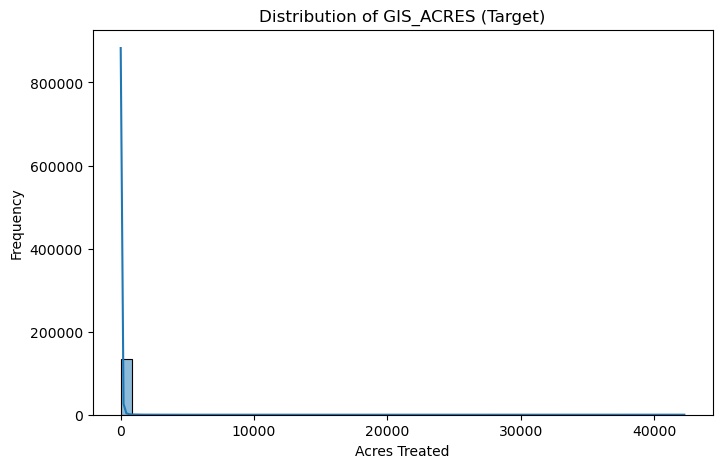

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(df_model['GIS_ACRES'], bins=50, kde=True)
plt.title("Distribution of GIS_ACRES (Target)")
plt.xlabel("Acres Treated")
plt.ylabel("Frequency")
plt.show()


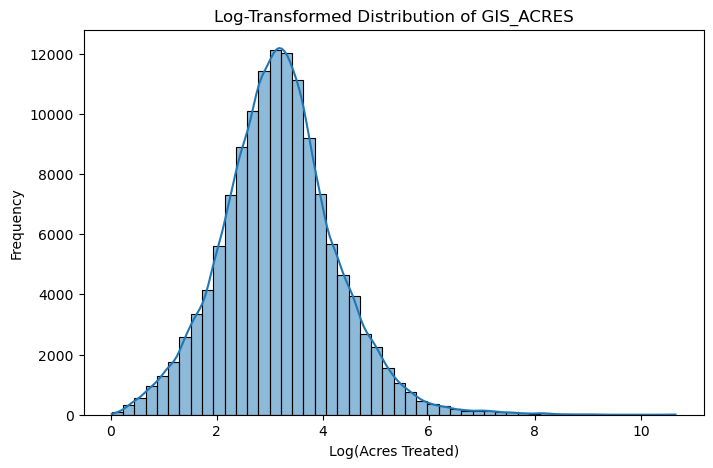

In [47]:
import numpy as np

# Add a new column with log-transformed target
df_model['LOG_GIS_ACRES'] = np.log1p(df_model['GIS_ACRES'])  # log1p handles 0 safely

# Plot the transformed distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_model['LOG_GIS_ACRES'], bins=50, kde=True)
plt.title("Log-Transformed Distribution of GIS_ACRES")
plt.xlabel("Log(Acres Treated)")
plt.ylabel("Frequency")
plt.show()


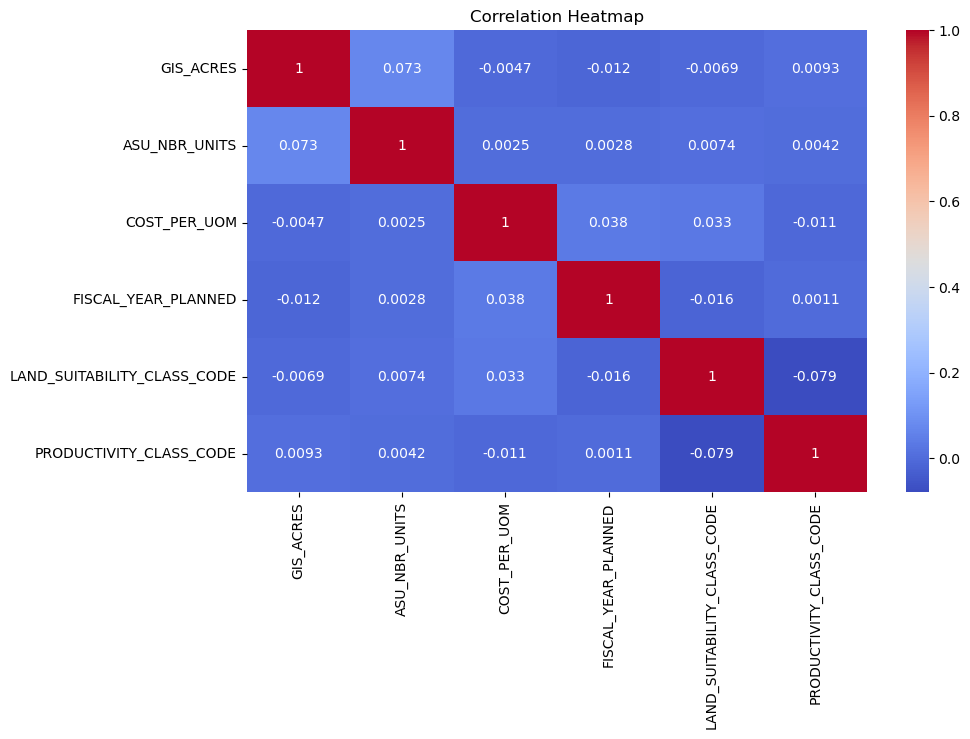

In [48]:
# Only numerical features
numerical_cols = ['GIS_ACRES', 'ASU_NBR_UNITS', 'COST_PER_UOM', 
                  'FISCAL_YEAR_PLANNED', 'LAND_SUITABILITY_CLASS_CODE', 
                  'PRODUCTIVITY_CLASS_CODE']

plt.figure(figsize=(10, 6))
sns.heatmap(df_model[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


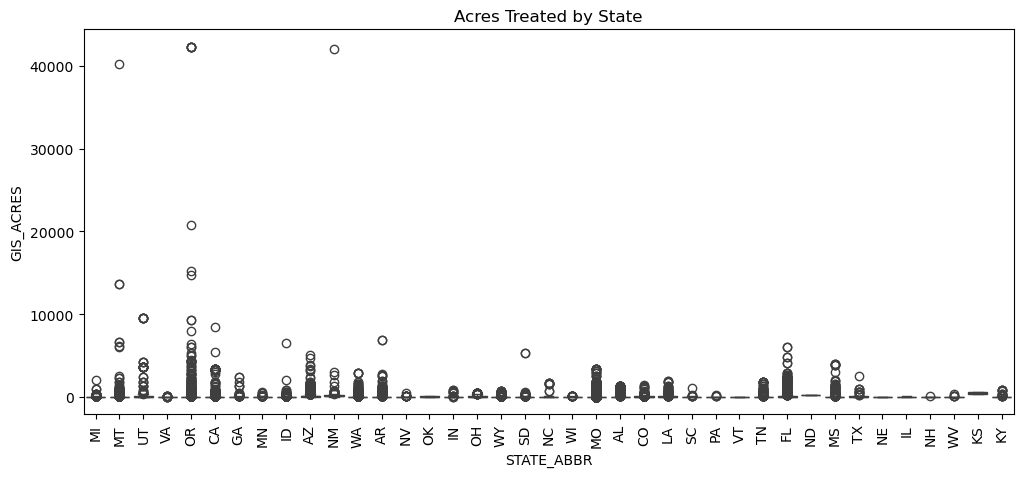

In [49]:
# STATE_ABBR
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_model, x='STATE_ABBR', y='GIS_ACRES')
plt.xticks(rotation=90)
plt.title("Acres Treated by State")
plt.show()


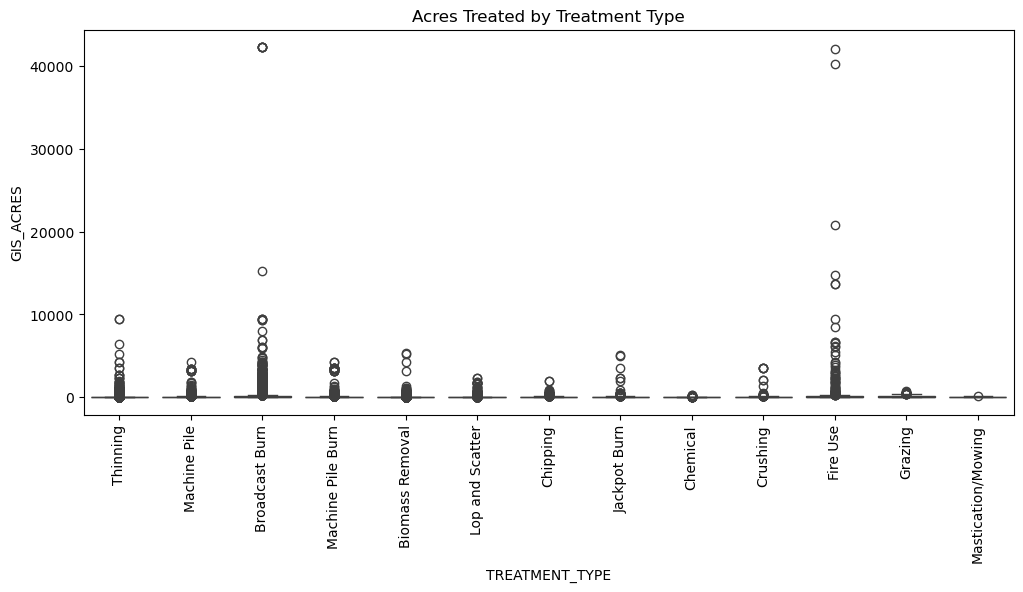

In [50]:
# TREATMENT_TYPE
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_model, x='TREATMENT_TYPE', y='GIS_ACRES')
plt.xticks(rotation=90)
plt.title("Acres Treated by Treatment Type")
plt.show()


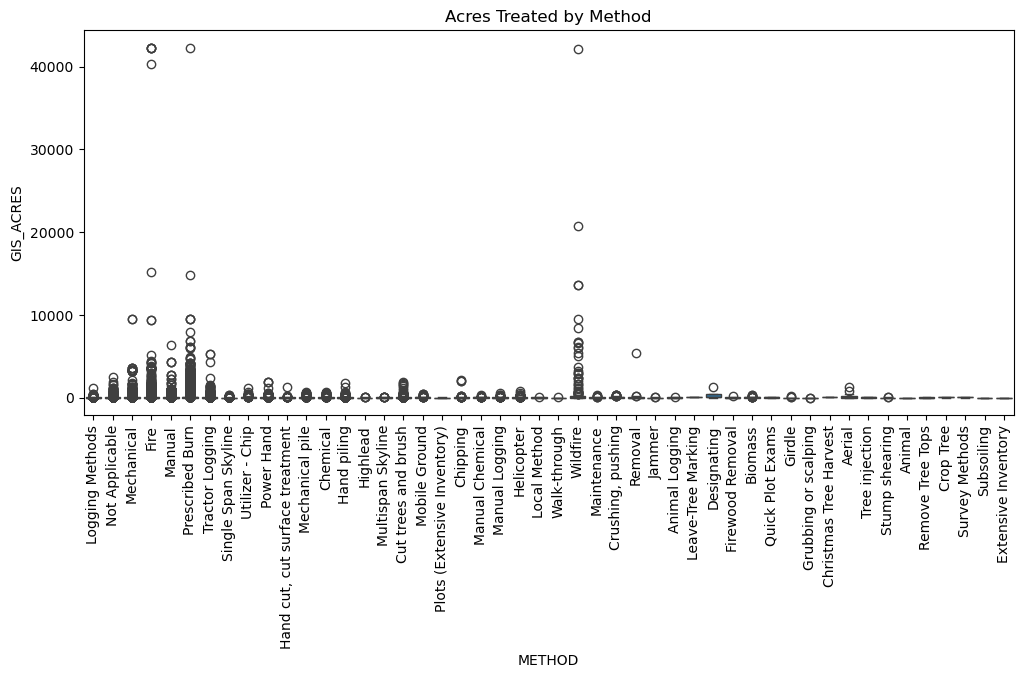

In [51]:
# METHOD
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_model, x='METHOD', y='GIS_ACRES')
plt.xticks(rotation=90)
plt.title("Acres Treated by Method")
plt.show()


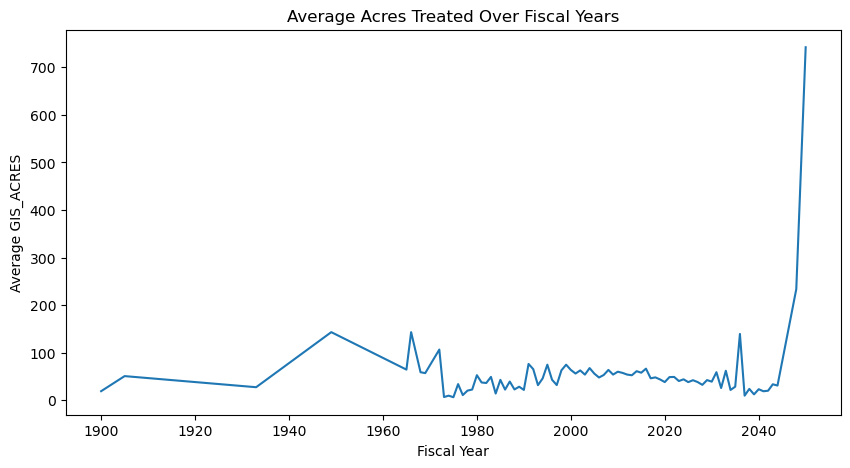

In [52]:
# Average acres treated per year
yearly_avg = df_model.groupby('FISCAL_YEAR_PLANNED')['GIS_ACRES'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values)
plt.title("Average Acres Treated Over Fiscal Years")
plt.xlabel("Fiscal Year")
plt.ylabel("Average GIS_ACRES")
plt.show()


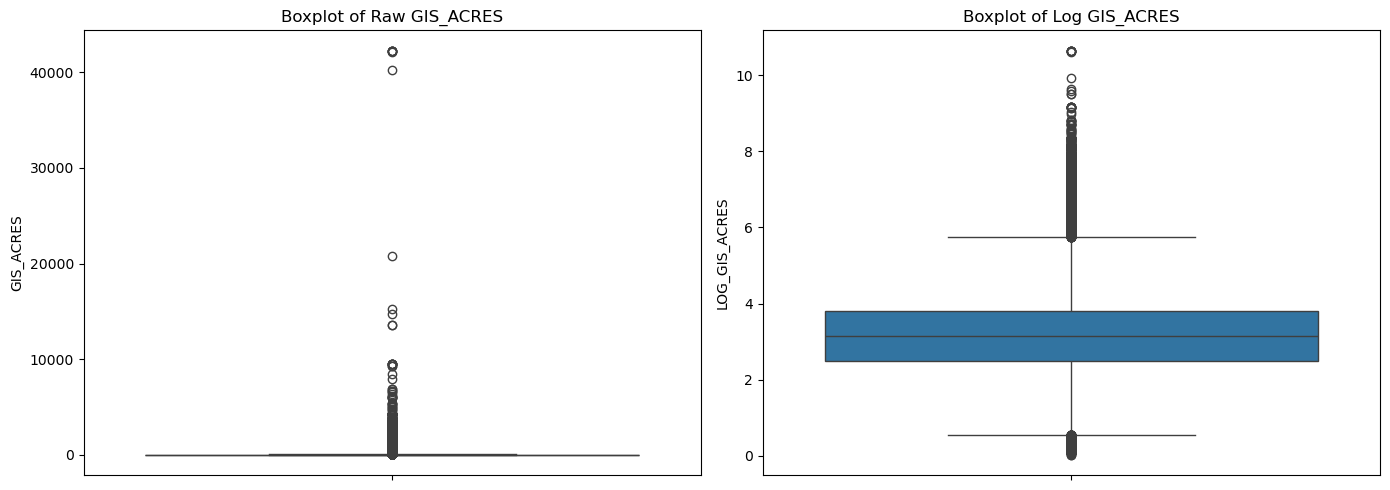

In [53]:
# Boxplot of GIS_ACRES (raw and log)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(y=df_model['GIS_ACRES'], ax=axes[0])
axes[0].set_title("Boxplot of Raw GIS_ACRES")

sns.boxplot(y=df_model['LOG_GIS_ACRES'], ax=axes[1])
axes[1].set_title("Boxplot of Log GIS_ACRES")

plt.tight_layout()
plt.show()


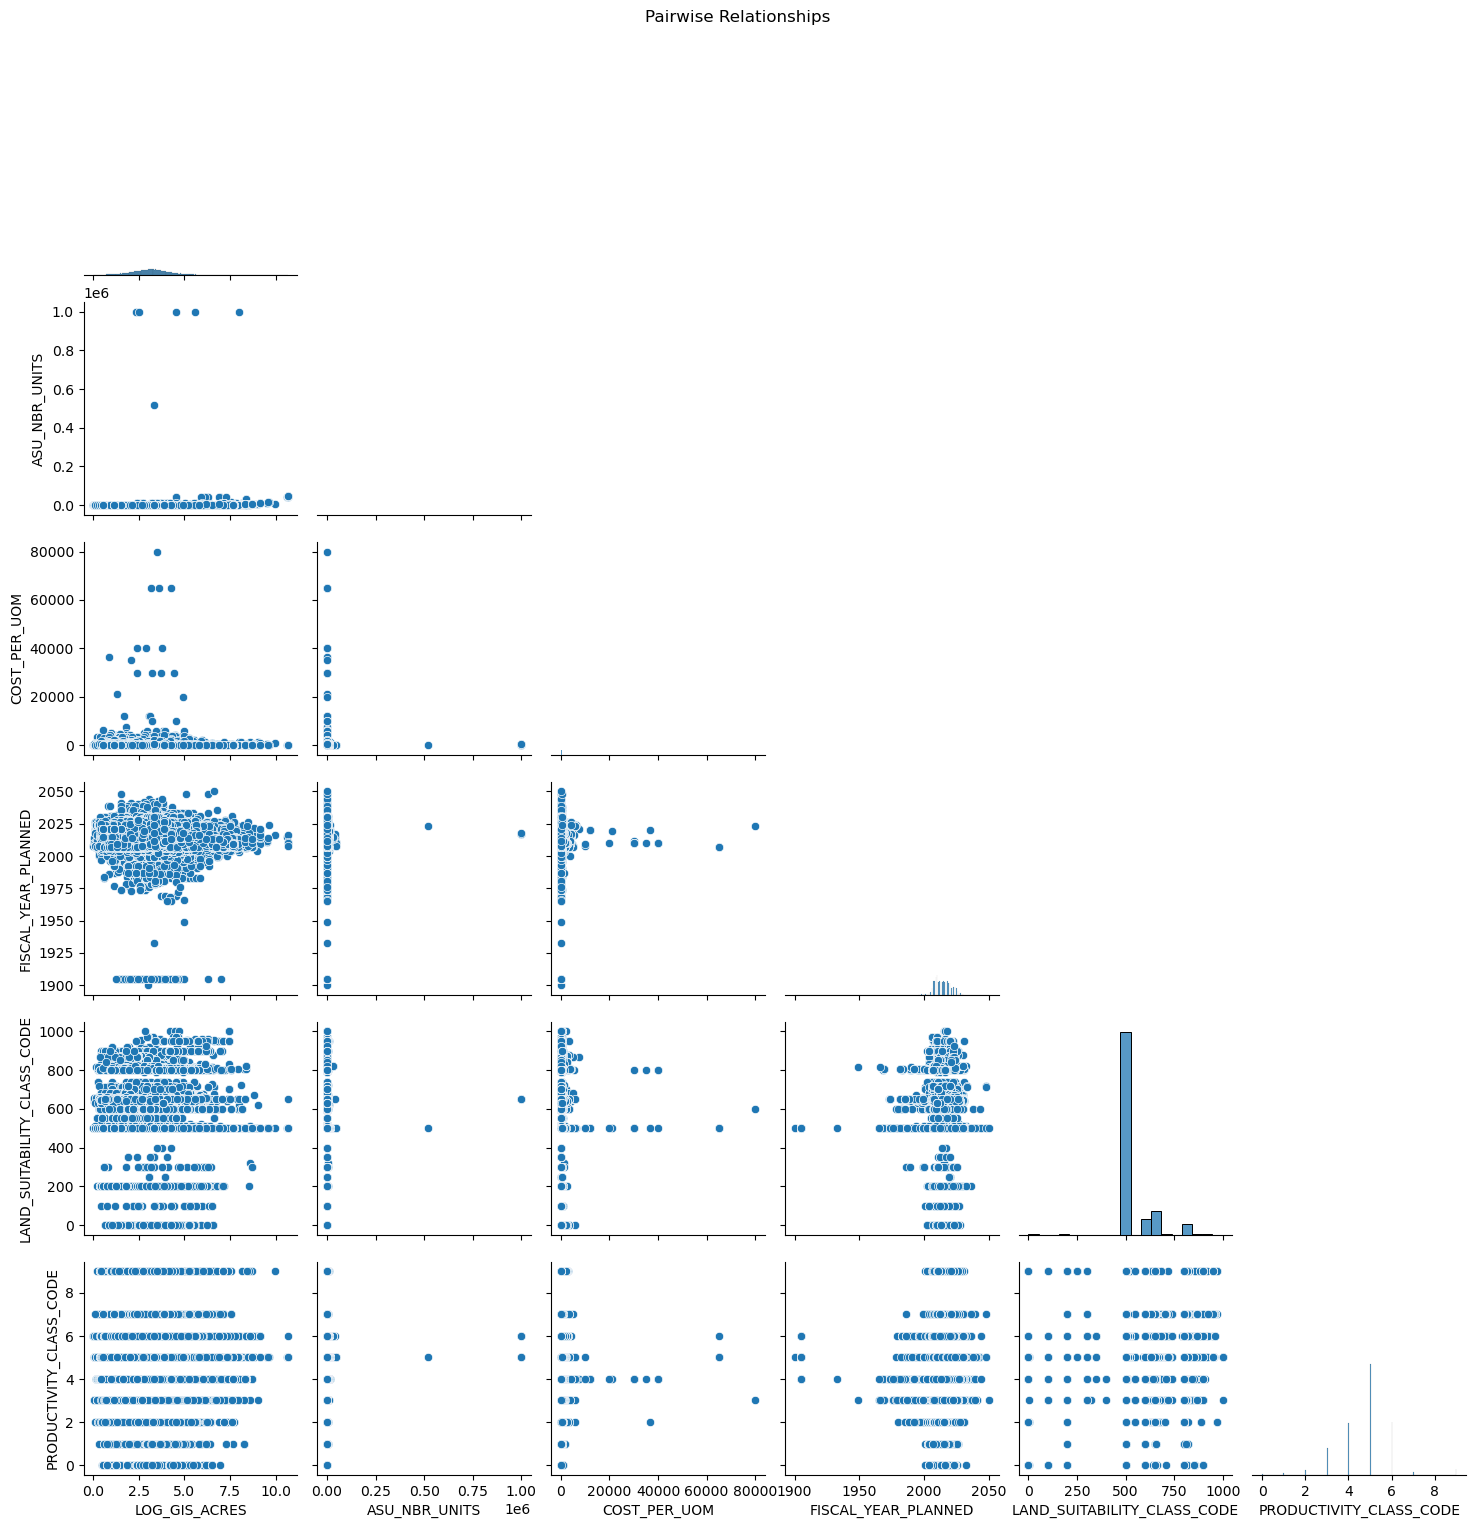

In [54]:
sns.pairplot(df_model[['LOG_GIS_ACRES', 'ASU_NBR_UNITS', 'COST_PER_UOM', 
                       'FISCAL_YEAR_PLANNED', 'LAND_SUITABILITY_CLASS_CODE',
                       'PRODUCTIVITY_CLASS_CODE']], corner=True)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


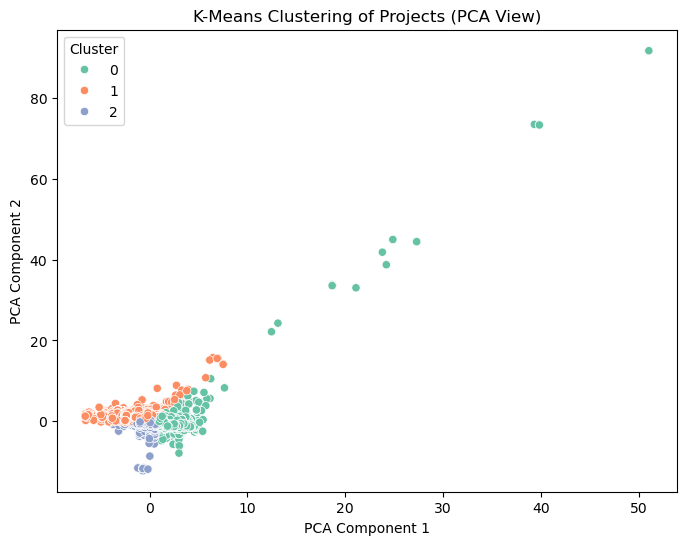

In [55]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define numeric columns manually

num_cols = [
    'ASU_NBR_UNITS',
    'COST_PER_UOM',
    'FISCAL_YEAR_PLANNED',
    'LAND_SUITABILITY_CLASS_CODE',
    'PRODUCTIVITY_CLASS_CODE'
]

# Use numerical features only
X_cluster = df_model[num_cols]
X_cluster_scaled = StandardScaler().fit_transform(X_cluster)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("K-Means Clustering of Projects (PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [56]:
# Add cluster labels back to your dataset
df_model_clustered = df_model.copy()
df_model_clustered['Cluster'] = clusters


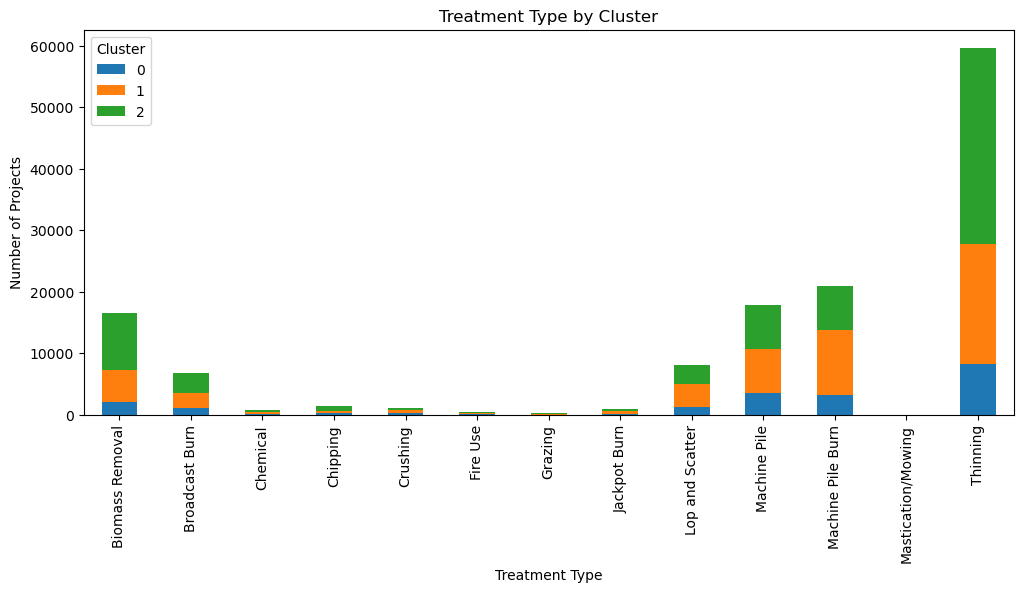

In [57]:
treatment_by_cluster = pd.crosstab(df_model_clustered['TREATMENT_TYPE'], df_model_clustered['Cluster'])
treatment_by_cluster.plot(kind='bar', stacked=True, figsize=(12, 5))
plt.title("Treatment Type by Cluster")
plt.xlabel("Treatment Type")
plt.ylabel("Number of Projects")
plt.xticks(rotation=90)
plt.show()


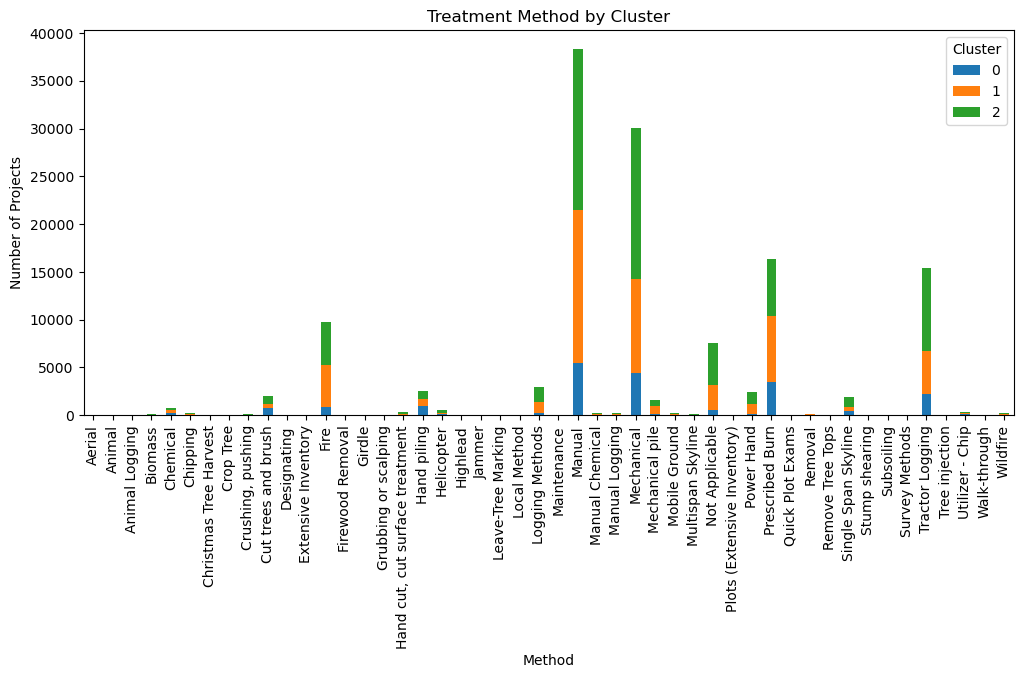

In [58]:
method_by_cluster = pd.crosstab(df_model_clustered['METHOD'], df_model_clustered['Cluster'])
method_by_cluster.plot(kind='bar', stacked=True, figsize=(12, 5))
plt.title("Treatment Method by Cluster")
plt.xlabel("Method")
plt.ylabel("Number of Projects")
plt.xticks(rotation=90)
plt.show()


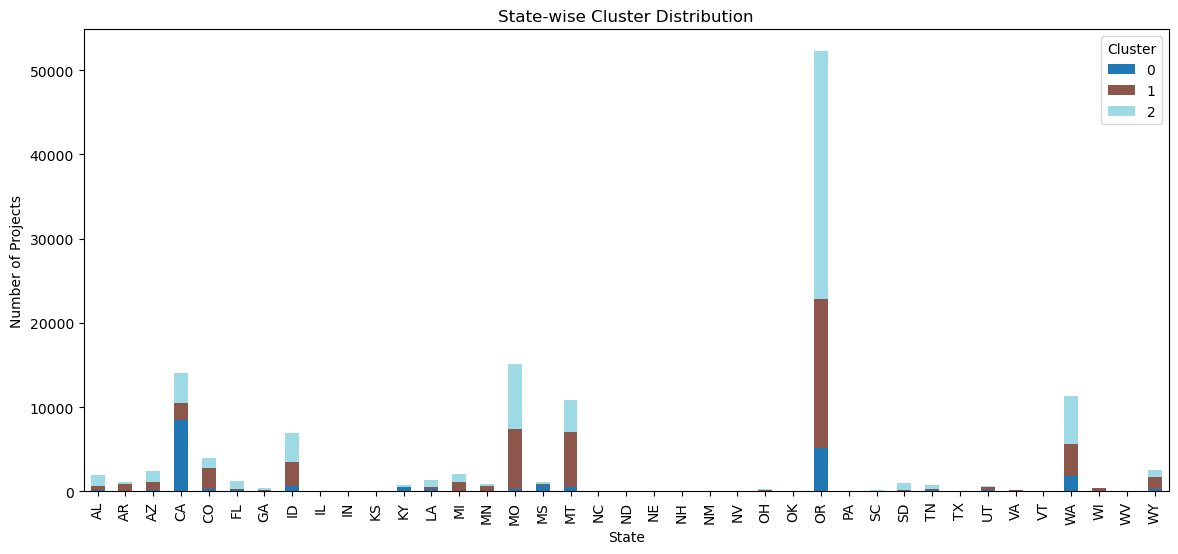

In [59]:
state_by_cluster = pd.crosstab(df_model_clustered['STATE_ABBR'], df_model_clustered['Cluster'])
state_by_cluster.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title("State-wise Cluster Distribution")
plt.xlabel("State")
plt.ylabel("Number of Projects")
plt.xticks(rotation=90)
plt.show()


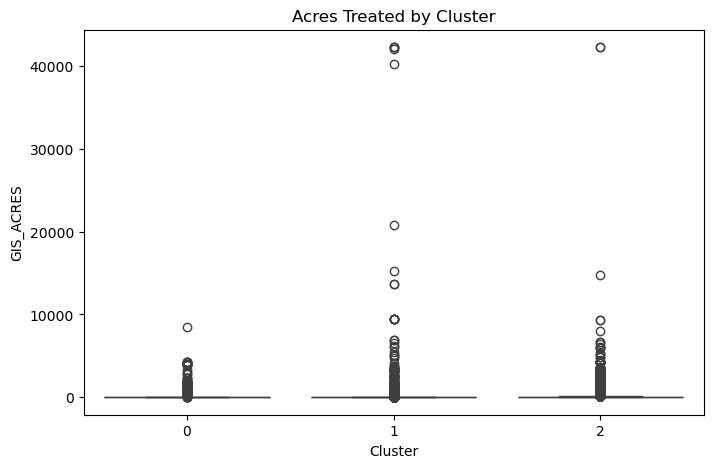

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_model_clustered, x='Cluster', y='GIS_ACRES')
plt.title("Acres Treated by Cluster")
plt.ylabel("GIS_ACRES")
plt.show()


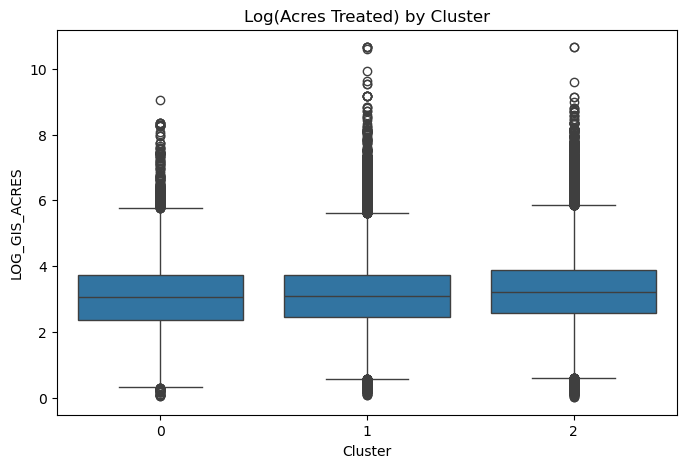

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_model_clustered, x='Cluster', y='LOG_GIS_ACRES')
plt.title("Log(Acres Treated) by Cluster")
plt.ylabel("LOG_GIS_ACRES")
plt.show()


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

q_high = df_model_clustered['GIS_ACRES'].quantile(0.99)
df_model_clustered = df_model_clustered[df_model_clustered['GIS_ACRES'] < q_high]

# Features and Target
X = df_model_clustered.drop(columns=['GIS_ACRES', 'LOG_GIS_ACRES'])
y = df_model_clustered['GIS_ACRES']  # Use raw values to avoid log conversion

cat_cols = ['STATE_ABBR', 'TREATMENT_TYPE', 'METHOD', 'OWNERSHIP_CODE']
num_cols = [col for col in X.columns if col not in cat_cols + ['Cluster']]
all_num = num_cols + ['Cluster']  # Cluster is numeric

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), all_num),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

# Fast Random Forest Pipeline
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        max_depth=15,              # limit depth to speed up
        random_state=42,
        n_jobs=-1                  # use all CPU cores
    ))
])

# Train model
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)


In [102]:
def evaluate(y_true, y_pred):
    print(" Model Evaluation:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")

evaluate(y_test, y_pred)


 Model Evaluation:
RMSE: 8.07
MAE: 2.45
R² Score: 0.9421


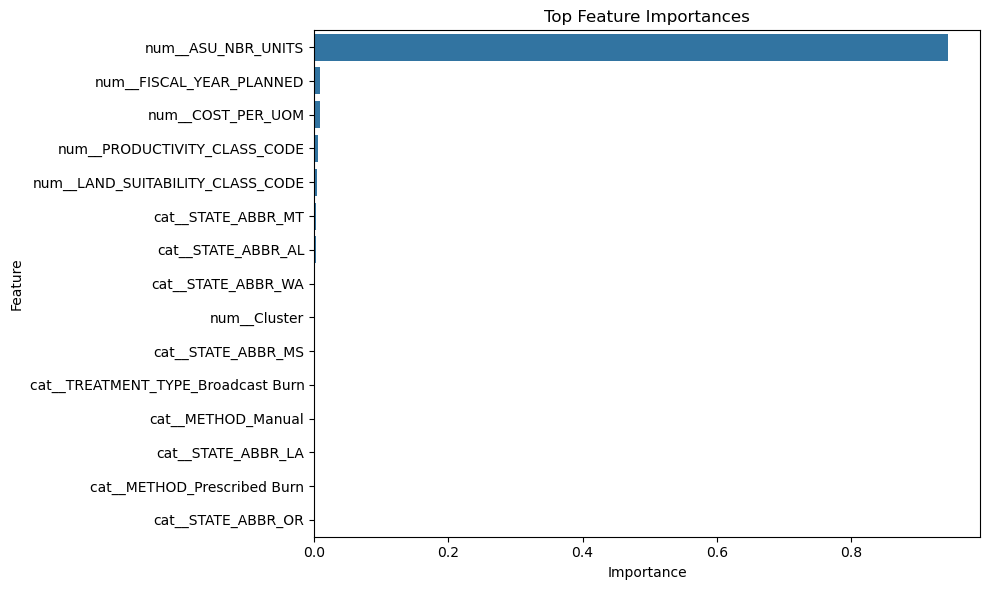

In [107]:
importances = rf_model.named_steps['regressor'].feature_importances_
features = rf_model.named_steps['preprocessor'].get_feature_names_out()

imp_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=imp_df.head(15), x='Importance', y='Feature')
plt.title("Top Feature Importances")
plt.tight_layout()
plt.show()


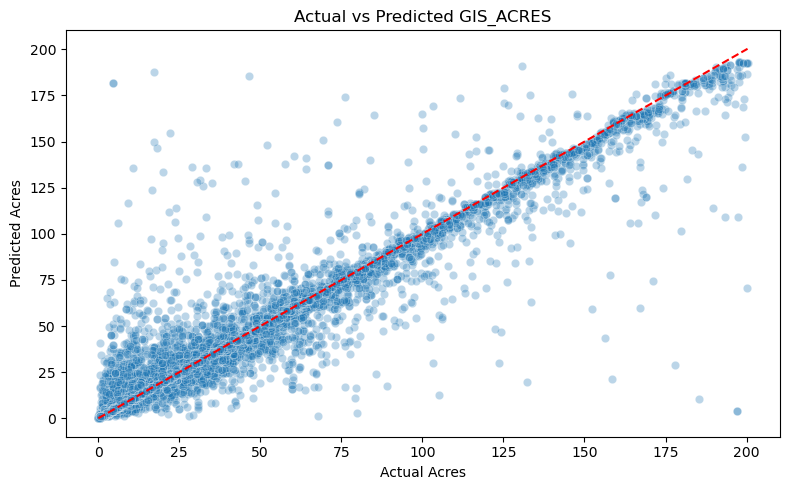

In [105]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted GIS_ACRES")
plt.xlabel("Actual Acres")
plt.ylabel("Predicted Acres")
plt.tight_layout()
plt.show()


In [112]:
#XGBOOST  
!pip install xgboost shap
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define pipeline components
cat_cols = ['STATE_ABBR', 'TREATMENT_TYPE', 'METHOD', 'OWNERSHIP_CODE']
num_cols = [col for col in X.columns if col not in cat_cols + ['Cluster']]
all_num = num_cols + ['Cluster']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), all_num),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

# XGBoost Regressor
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42))
])
# Define param grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [4, 6, 8],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.7/150.0 MB 24.2 MB/s eta 0:00:07
   --- ------------------------------------ 13.4/150.0 MB 41.9 MB/s eta 0:00:04
   ------ --------------------------------- 23.3/150.0 MB 43.4 MB/s eta 0:00:03
   -------- ------------------------------- 33.6/150.0 MB 44.4 MB/s eta 0:00:03
   ----------- ---------------------------- 41.9/150.0 MB 43.0 MB/s eta 0:00:03
   -------------- ------------------------- 53.5/150.0 MB 45.4 MB/s eta 0:00:03
   ---------------- ----------------------- 63.2/150.0 MB 45.8 MB/s eta 0:00:02
   ------------------- -------------------- 73.9/150.0 MB 46.2 MB/s eta 0:00:02
   ---------------------- ----------------- 85.2/150.0 MB 47.3 MB/s eta 0:00:02
   ------------------------- -------------- 96.2/150.0 MB 48.0 MB/s eta 0:00:02
   --------------------------- ----------- 107.2/150.0 MB 48.5 MB/s eta 0:00:01
   ------------------------------ -------- 117.4/1

Average R² Score (CV): 0.9361
 Model Evaluation:
RMSE: 8.11
MAE: 2.56
R² Score: 0.9414


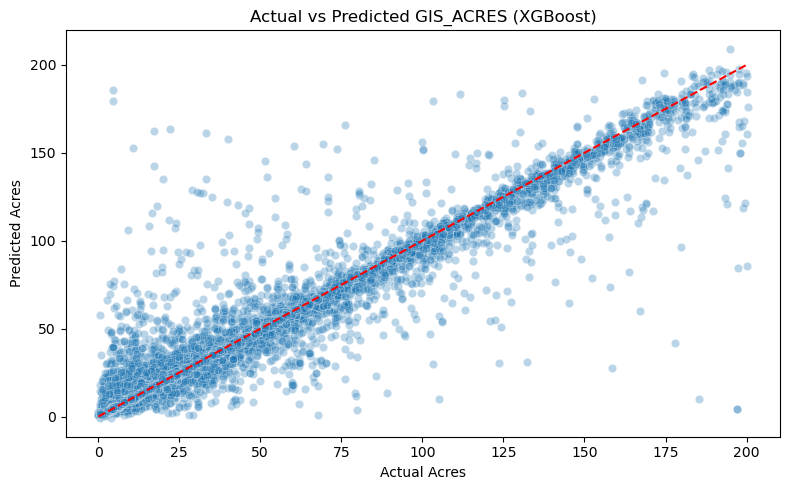

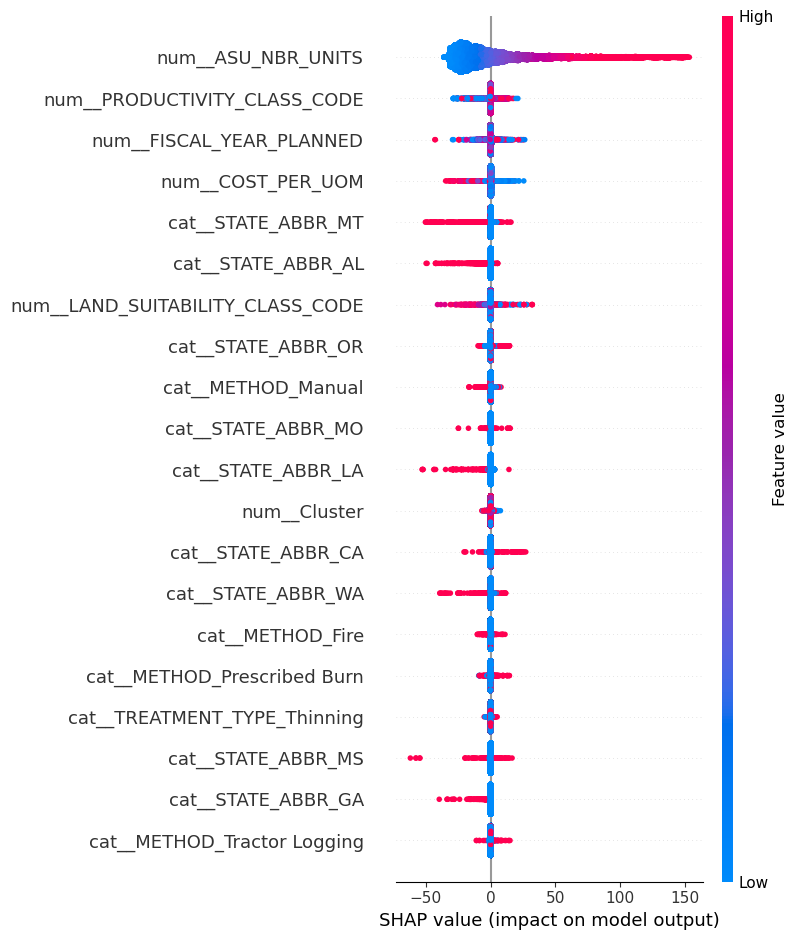

In [114]:
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f"Average R² Score (CV): {scores.mean():.4f}")

y_pred = best_model.predict(X_test)

evaluate(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted GIS_ACRES (XGBoost)")
plt.xlabel("Actual Acres")
plt.ylabel("Predicted Acres")
plt.tight_layout()
plt.show()

import shap

# Re-fit model on full training set for SHAP explanation
preprocessed_X = preprocessor.fit_transform(X_train)
model = grid_search.best_estimator_.named_steps['regressor']

# Use TreeExplainer for SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(preprocessed_X)

# Summary plot (feature impact)
shap.summary_plot(shap_values, preprocessed_X, feature_names=preprocessor.get_feature_names_out())


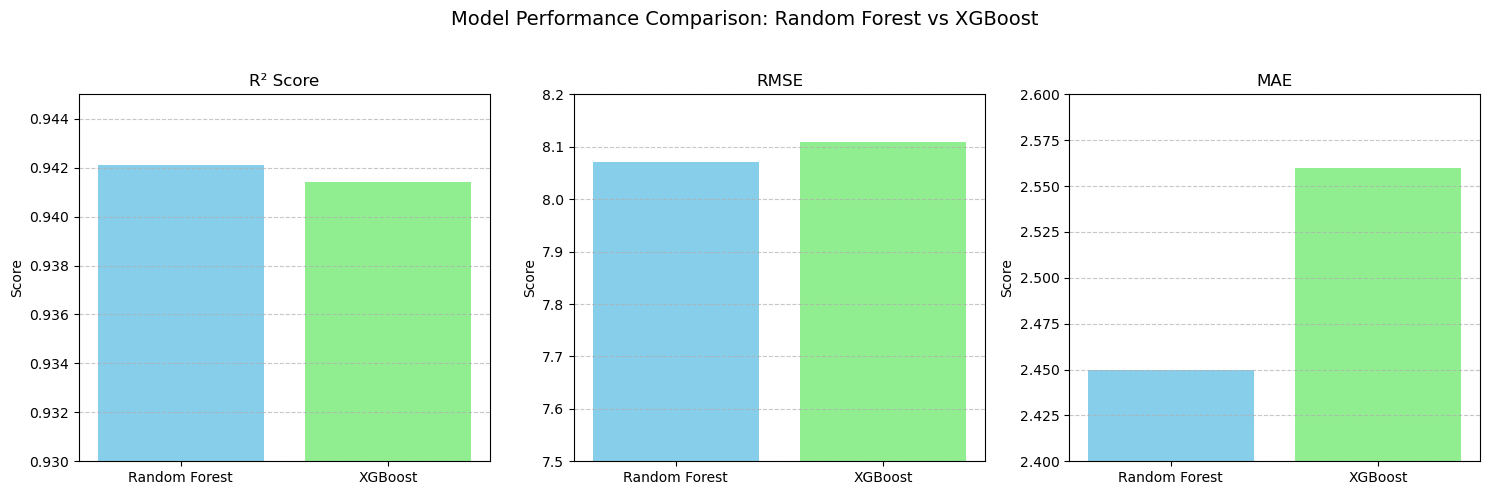

In [116]:
# Re-import necessary libraries after code execution state reset
import matplotlib.pyplot as plt

# Performance metrics
models = ['Random Forest', 'XGBoost']
r2_scores = [0.9421, 0.9414]
rmse_scores = [8.07, 8.11]
mae_scores = [2.45, 2.56]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# R² Score
axes[0].bar(models, r2_scores, color=['skyblue', 'lightgreen'])
axes[0].set_title("R² Score")
axes[0].set_ylim(0.93, 0.945)

# RMSE
axes[1].bar(models, rmse_scores, color=['skyblue', 'lightgreen'])
axes[1].set_title("RMSE")
axes[1].set_ylim(7.5, 8.2)

# MAE
axes[2].bar(models, mae_scores, color=['skyblue', 'lightgreen'])
axes[2].set_title("MAE")
axes[2].set_ylim(2.4, 2.6)

for ax in axes:
    ax.set_ylabel("Score")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Model Performance Comparison: Random Forest vs XGBoost", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
